# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import warnings

# Data Importing

In [2]:
data=pd.read_csv('/kaggle/input/data-science-salaries-2023/ds_salaries.csv')
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


# Data Describe

In [3]:
data.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


# Data Preprocessing & Cleaning

In [6]:
df=data.copy()
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [7]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

<Axes: >

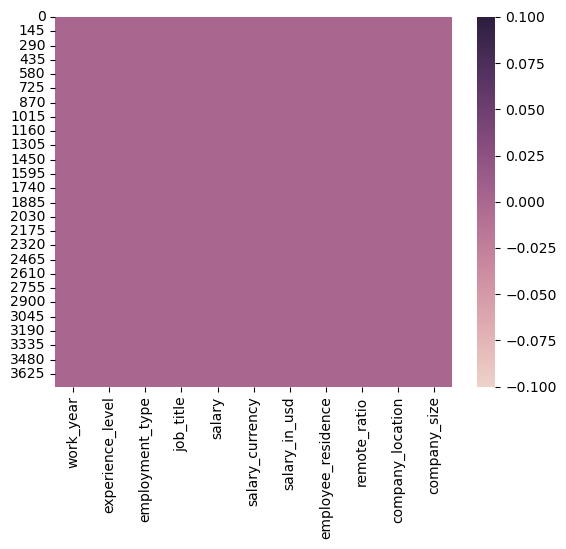

In [8]:
sns.heatmap( df.isnull(),cmap=sns.cubehelix_palette(as_cmap=True))

 we don't have null values

In [9]:
df['experience_level'].value_counts()

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

In [10]:
df['experience_level'].replace(['SE','MI','EN','EX'],["Senior-level / Expert","Mid-level / Intermediate","Entry-level / Junior","Executive-level / Director"],inplace=True)

In [11]:
df['experience_level'].value_counts()

Senior-level / Expert         2516
Mid-level / Intermediate       805
Entry-level / Junior           320
Executive-level / Director     114
Name: experience_level, dtype: int64

In [12]:
df['employment_type'].value_counts()

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

In [13]:
df['employment_type'].replace(['FT','PT','CT','FL'],["Full-time","Part-time","Contract","Freelance"],inplace=True)

In [14]:
df['employment_type'].value_counts()

Full-time    3718
Part-time      17
Contract       10
Freelance      10
Name: employment_type, dtype: int64

In [15]:
df['company_size'].value_counts()

M    3153
L     454
S     148
Name: company_size, dtype: int64

In [16]:
df['company_size'].replace(['M','L','S'],["medium","Large","Small"],inplace=True)

In [17]:
df['company_size'].value_counts()

medium    3153
Large      454
Small      148
Name: company_size, dtype: int64

# Data Visualization

In [18]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

<Axes: xlabel='salary_in_usd', ylabel='Density'>

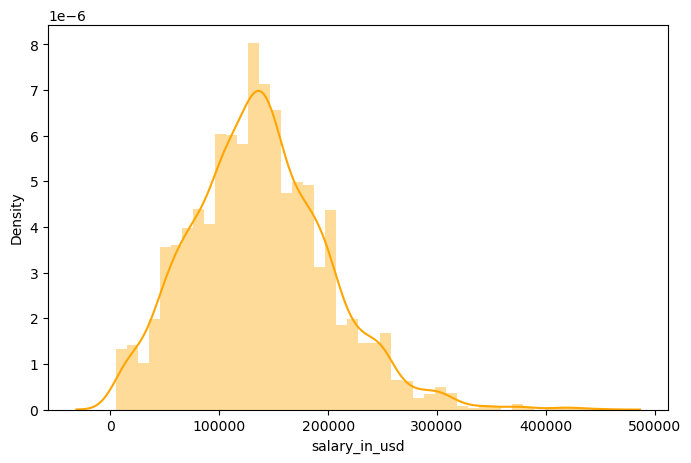

In [19]:
plt.figure(figsize=(8,5))
sns.distplot(df['salary_in_usd'], hist=True, color='orange')

Most workers in the field of data science have salaries ranging between 50,000 to 500,000, but most are concentrated between 100,000 and 200,000 usd.

In [20]:
fig = px.pie(df, names='experience_level', title='experience_level',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

Most of those working in the field of data science are senior level

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

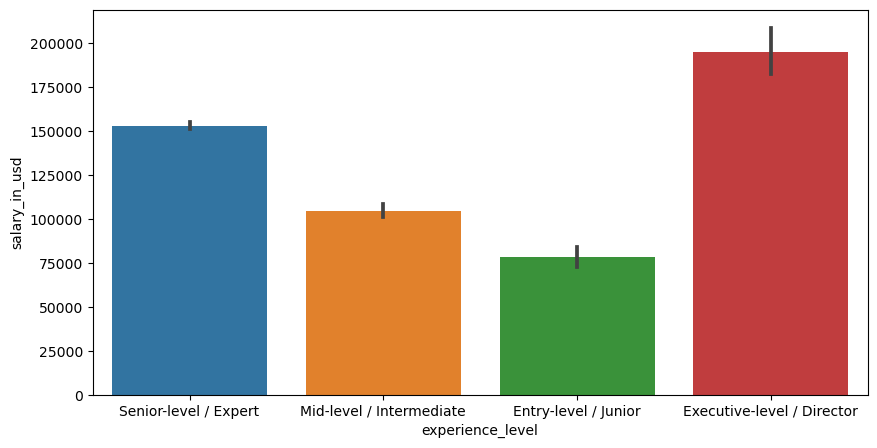

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x='experience_level',y='salary_in_usd',data=df)

The higher the level of experience, the higher the salary

 The highest salary for director level
 Senior level comes after the director level

<Axes: xlabel='work_year', ylabel='count'>

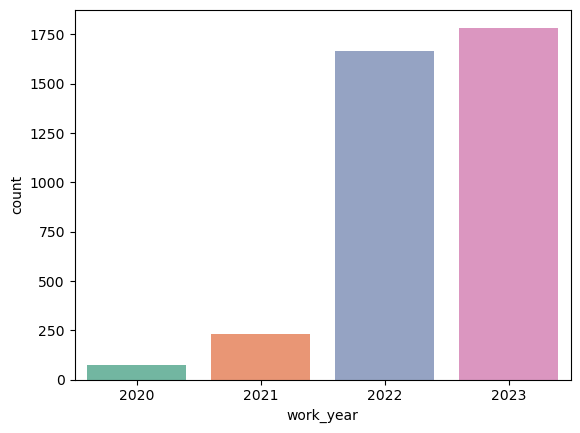

In [22]:
sns.countplot(x= df["work_year"], palette="Set2")

The most hiring year for those working in the field of data science is 2023

<Axes: xlabel='experience_level', ylabel='count'>

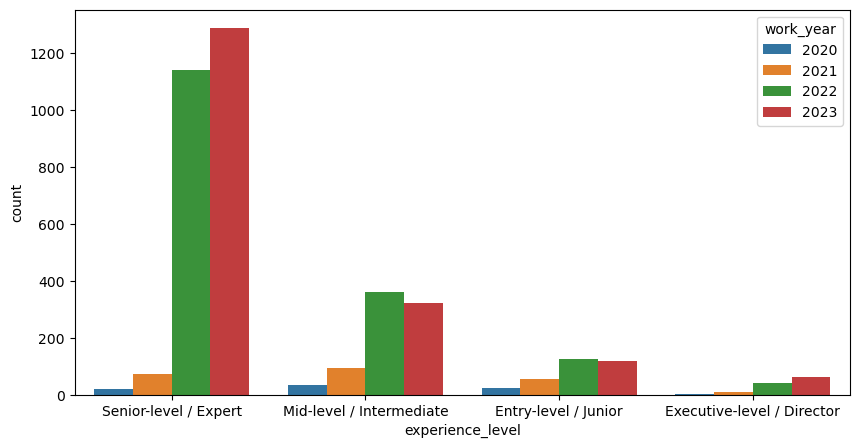

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="experience_level", hue="work_year")

The most employed category in the field of data science in 2023 is senior level

The most employed category in the field of data science in 2022 is mid level

In [24]:
fig = px.pie(df,names='employment_type',title='employment_type',color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.show()

The most employment type is full time

<Axes: xlabel='employment_type', ylabel='salary_in_usd'>

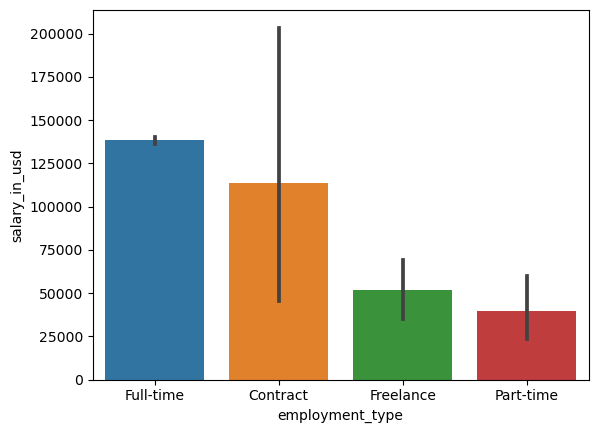

In [25]:
sns.barplot(x='employment_type',y='salary_in_usd',data=df)

The full time 's employees is the highest salary after them the contract employees

<Axes: xlabel='employment_type', ylabel='count'>

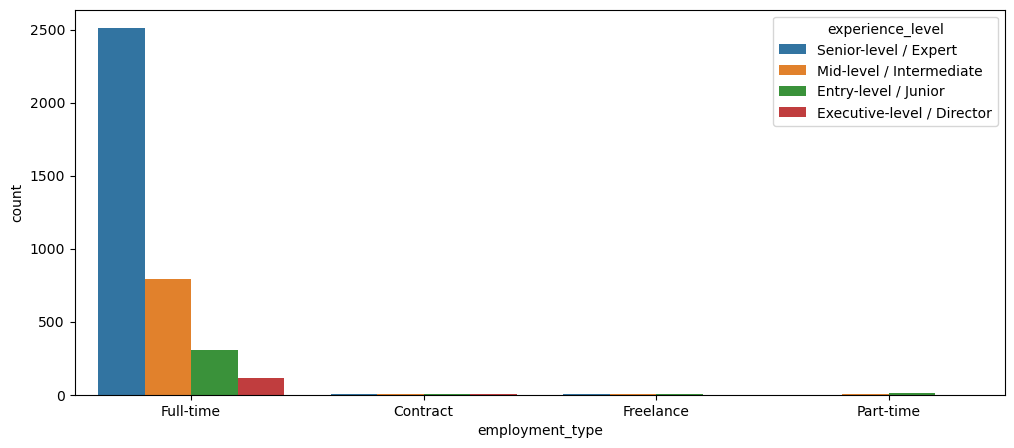

In [26]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x="employment_type", hue="experience_level")

The most of full time's employees is in senior level

<Axes: xlabel='employment_type', ylabel='count'>

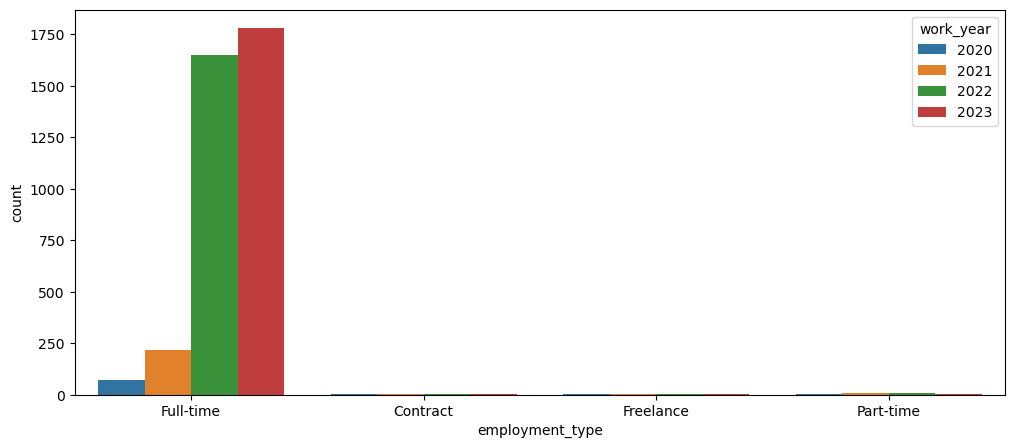

In [27]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x="employment_type", hue="work_year")

The full time employees, the year they were employed the most is 2023

In [28]:
df['job_title'].value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [29]:
px.scatter(df.sample(2000), 
           title='job_title vs salary_in_usd.',
           x='job_title', 
           y='salary_in_usd', 
           )

The research scientist is the highest salary after them the Ai scientists

<Axes: xlabel='remote_ratio', ylabel='Density'>

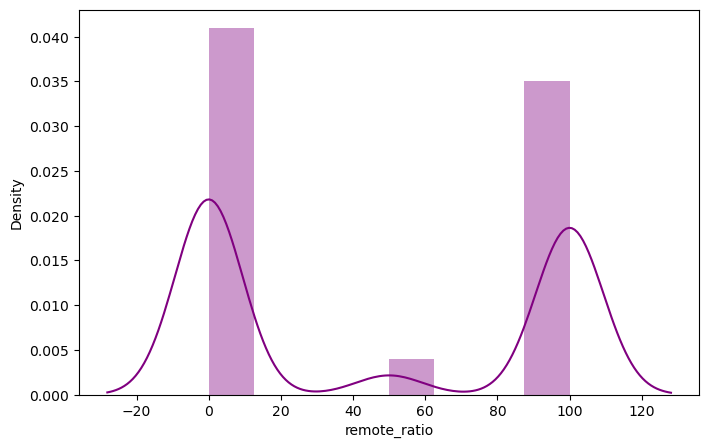

In [30]:
plt.figure(figsize=(8,5))
sns.distplot(df['remote_ratio'], hist=True, color='purple')

In [31]:
px.scatter(df.sample(2000), 
           title='employee_residence vs salary_in_usd.',
           x='employee_residence', 
           y='salary_in_usd', 
           )

The highest salary earned by residents of the United Kingdom (GB) comes after them residents of the United States (US) and the lowest salary of residents of Brazil(BR)

In [32]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [33]:
px.scatter(df,
           title='company_location vs. employee_residence',
           x='company_location',
           y='employee_residence',
        )

Most of the employees reside in the same country in which they work

In [34]:
df['company_size'].value_counts()

medium    3153
Large      454
Small      148
Name: company_size, dtype: int64

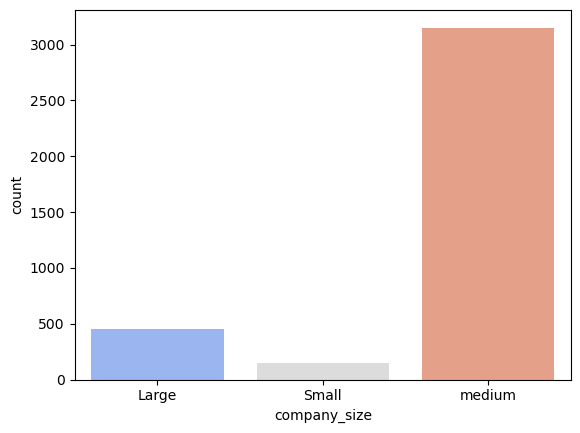

In [35]:
b=sns.countplot(x= 'company_size' ,data = df ,palette='coolwarm'  )
plt.show()

The size of companies varies between small, large and medium, but most of them are medium in size

In [36]:
fig = px.pie(df, values='salary_in_usd', names='company_size', color='company_size',
             color_discrete_map={'medium':'cyan',
                                 'Large':'royalblue',
                                 'Small':'darkblue'})
fig.show()

The size of companies varies between small, large and medium, but most of them are medium in size

In [37]:
px.scatter(df,
           title='company_size vs. company_location',
           x='company_size',
           y='company_location',
        )

In [38]:
df.groupby(['company_size', 'company_location'])['company_location'].count()

company_size  company_location
Large         AE                     1
              AR                     2
              AS                     1
              AT                     3
              AU                     8
                                  ... 
medium        SI                     2
              TH                     1
              TR                     4
              UA                     2
              US                  2723
Name: company_location, Length: 133, dtype: int64

# Encoding the String Dataset

In [39]:
df.describe(include=object)

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755,3755
unique,4,4,93,20,78,72,3
top,Senior-level / Expert,Full-time,Data Engineer,USD,US,US,medium
freq,2516,3718,1040,3224,3004,3040,3153


In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [41]:
cols = ['experience_level', 'employment_type', 'job_title','salary_currency','employee_residence','company_location','company_size']
df[cols]=df[cols].apply(LabelEncoder().fit_transform)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   work_year           3755 non-null   int64
 1   experience_level    3755 non-null   int64
 2   employment_type     3755 non-null   int64
 3   job_title           3755 non-null   int64
 4   salary              3755 non-null   int64
 5   salary_currency     3755 non-null   int64
 6   salary_in_usd       3755 non-null   int64
 7   employee_residence  3755 non-null   int64
 8   remote_ratio        3755 non-null   int64
 9   company_location    3755 non-null   int64
 10  company_size        3755 non-null   int64
dtypes: int64(11)
memory usage: 322.8 KB


# Future Selection

<Axes: >

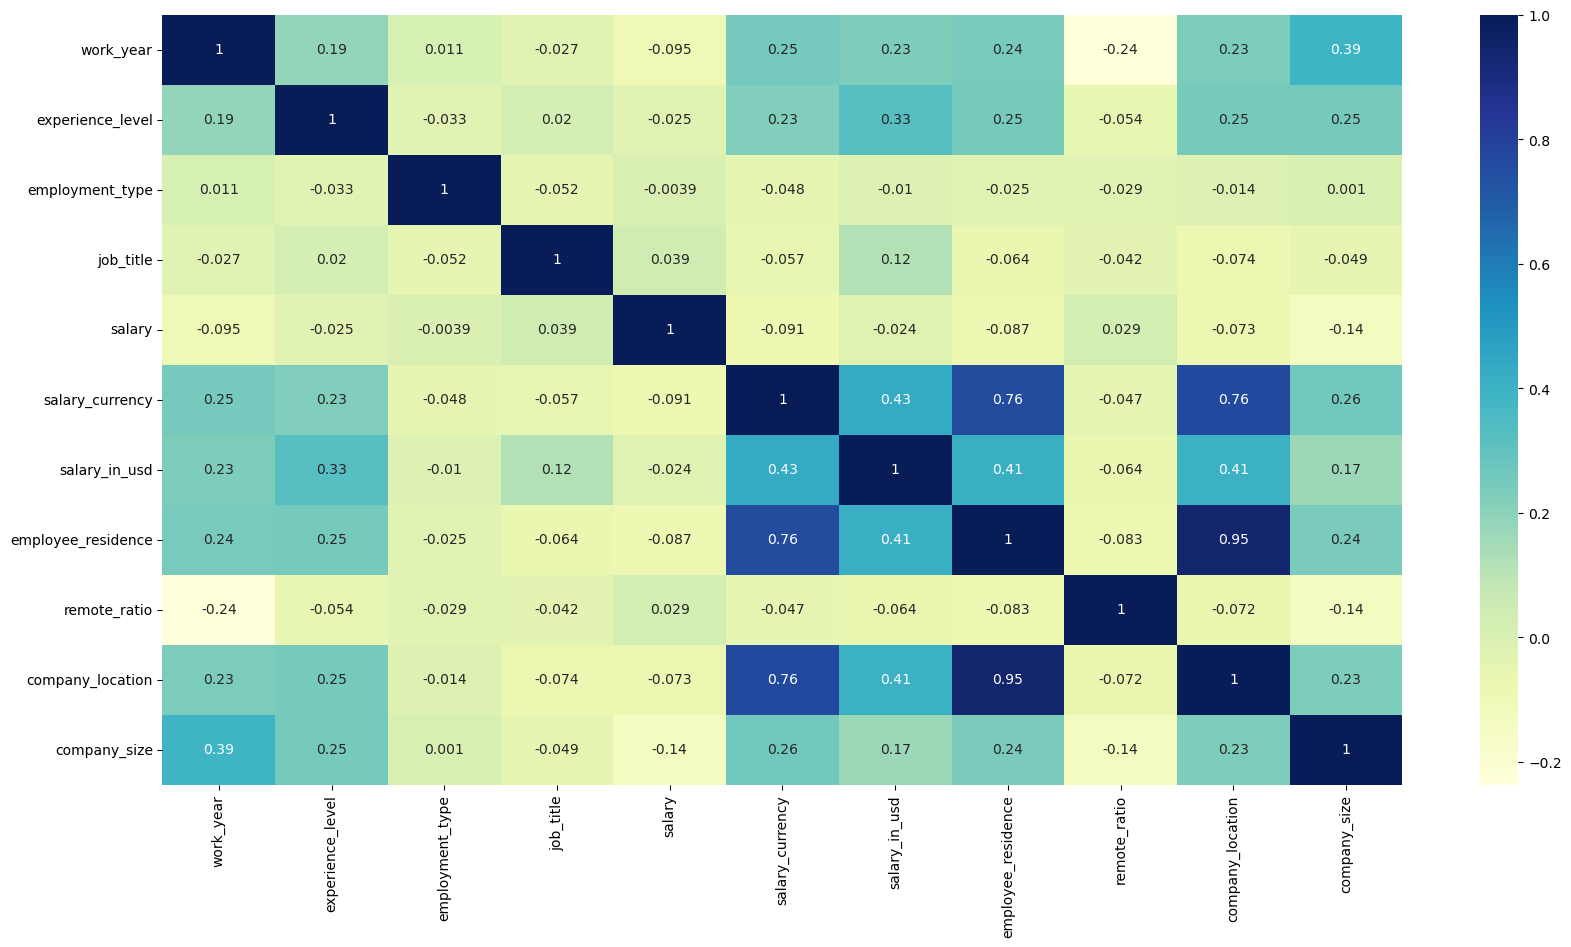

In [43]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr() , annot = True , cmap = "YlGnBu")

# Train Test Split

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x=df.drop('salary_in_usd',axis=1).values
y=df['salary_in_usd'].values

In [46]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=  0.25, random_state= 42)

# Modeling

# Random Forest Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rf=RandomForestRegressor(max_depth=7 , max_features=3,n_estimators= 100)

In [49]:
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=7, max_features=3)

In [50]:
rf.score(x_train, y_train)

0.9473818334594964

In [51]:
rf.score(x_test , y_test)

0.8674848748457539

# Model Evaluation

In [52]:
y_pred = rf.predict(x_test)

In [53]:
df3 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df3.head(20)

,Y_test,Y_pred
0,168000,176539.187400
1,179975,175270.357752
2,144000,144610.740745
3,222200,230807.822052
4,230000,150964.228502
5,40000,41118.324211
6,105000,115395.550922
7,100000,91291.766074
8,29751,23305.896476
9,153090,149022.753148


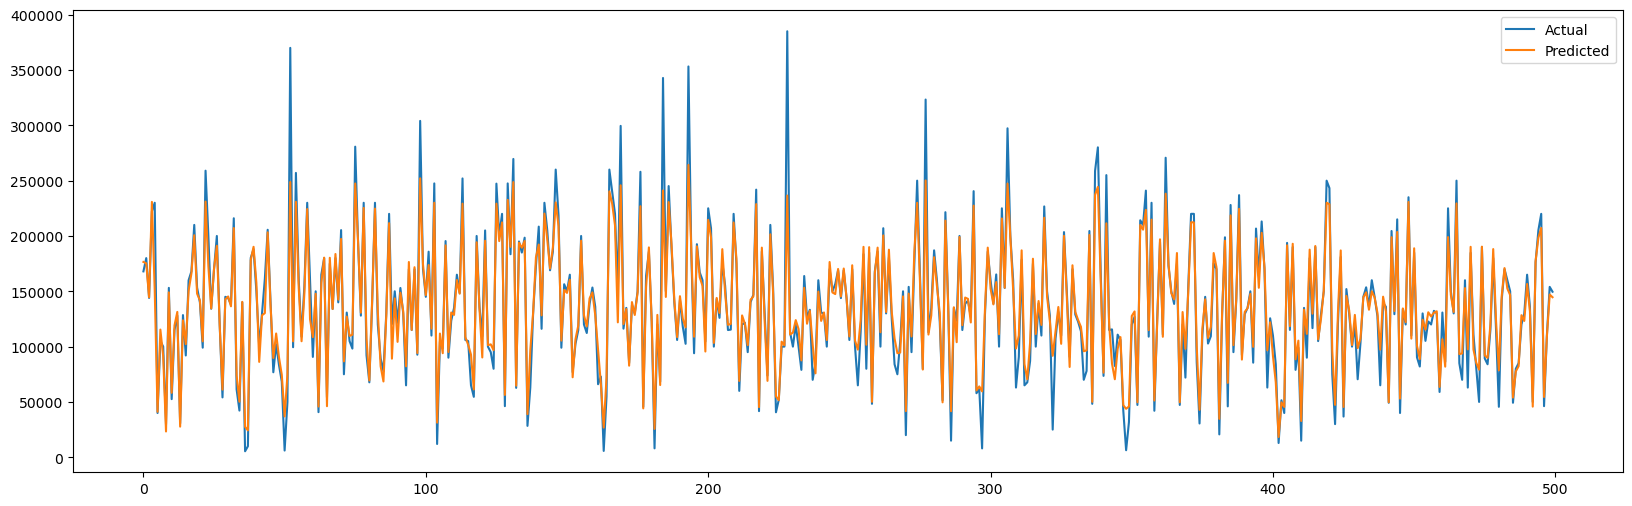

In [54]:
plt.figure(figsize= (20,6))

plt.plot(df3[:500])
plt.legend(["Actual" , "Predicted"])

In [55]:
from sklearn.metrics import r2_score

In [56]:
rf_score=r2_score(y_test , y_pred)
rf_score

0.8674848748457539

In [57]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

In [58]:
mse = mean_squared_error (y_test , y_pred)
print (mse)

mae = mean_absolute_error (y_test , y_pred)
print (mae)

mape = mean_absolute_percentage_error (y_test , y_pred)
print (mape)

543701055.1557224
10600.82195855982
0.14369107853975685


If you found it helpful, do upvote

Feel free to comment

I would love to have suggestions.